## Complex Pipe Network lecture problem
Code author: Dr. Robert Hesketh, hesketh@rowan.edu

Source: Problem 8.11 in Problem Solving in Chemical and Biochemical Engineering with POLYMATH, Excel, and MATLAB (2nd Edition), Publisher: Prentice Hall PTR; (September 22, 2007) ISBN-10: 0131482041 or ISBN-13: 978-0131482043, by Michael B. Cutlip and Mordechai Shacham.

# ChE Summer School Objectives
- Review this template which solves a system of nonlinear equations using fsolve function of MATLAB and python
- Save a copy of this template and recalculate the flowrates by replacing the constant friction factor with a friction factor that is a function of Reynolds number. Use the Shacham equation for the friction factor  $$f_F = \frac{1}{{16} \left\{\log \left[\frac{\varepsilon/D}{3.7}-\frac{5.02}{Re}\log\left(\frac{\varepsilon/D}{3.7}+\frac{14.5}{Re}\right)\right]\right\}^2}$$
- Comment on any difficulties that you had in modifying this template

Objectives
 - Solve a system of nonlinear equations using either MATLAB or python.
 - Derive a model of a complex pipe network where you are given a process flow diagram with all dimensions, an inlet and outlet system pressure, but not any flowrates.  Using fsolve from either MATLAB or python solve for the flowrate in each pipe segement.
 - Create a live script that documents the problem and its solution.  Modify this template to solve for parts b and c of the problem given below

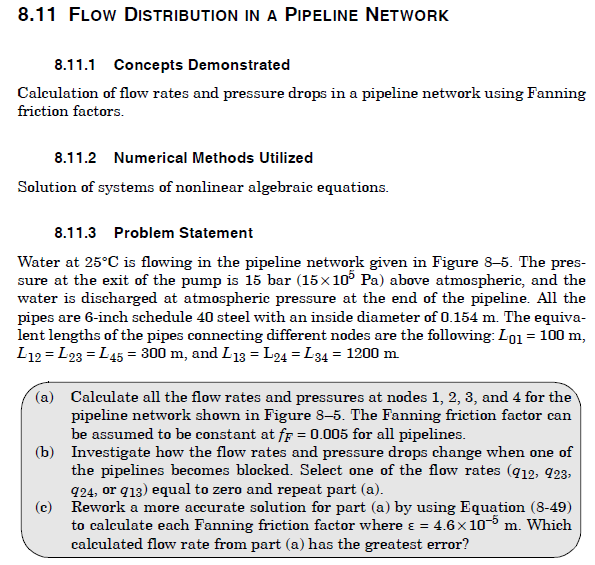

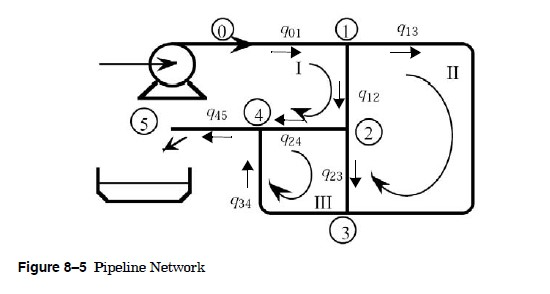

First derive the equations that you will need for this problem.  In the picture below the distance between each intersection is given and the intersections or nodes are labeled with a number.  Next a flow direction is assumed for each pipe segment and this direction is marked with an arrow.  In this manner the pressure drops are defined by this flow direction.


## Derivation of Equations
Water is flowing at 25°C.  All pipes are 6-inch Sch 40 (0.154m) <br>
**General Mechanical Energy Balance**
$$\frac{1}{2} \rho v_1^2+\rho g z_1+P_1+ \frac{\dot{W_s}}{q} 
= \frac{1}{2} \rho v_2^2+\rho g z_2+P_2+ \frac{2 \rho f_F v_{12}^2 L_{12}}{D}$$
**Shacham Equation**
$$f_F = \frac{1}{{16} \left\{\log \left[\frac{\varepsilon/D}{3.7}-\frac{5.02}{Re}\log\left(\frac{\varepsilon/D}{3.7}+\frac{14.5}{Re}\right)\right]\right\}^2}$$

$$Re=\frac{\rho v_{12} D_{12}}{\mu}$$
In each of the pipe segments we will solve for the pressure drop as a function of the flowrate.  
$$\Delta P_{ij} = k_{ij}q_{ij}^2$$<br>
$$k_{ij} = \frac{32 \rho f_{F_{ij}} \Delta L_{ij}}{\pi^2 D^5}$$

**Node Equations or Mass Balance**
$$0=q_{01}-q_{12}-q_{13}$$
$$0=q_{12}-q_{24}-q_{23}$$
$$0=q_{23}+q_{13}-q_{34}$$
$$0=q_{24}+q_{34}-q_{45}$$

**Loop Equations**
$$0=\Delta P_{P}+\Delta P_{01}+\Delta P_{12}+\Delta P_{24}+\Delta P_{45}$$
$$0=\Delta P_{13}-\Delta P_{23}-\Delta P_{12}$$
$$0=\Delta P_{23}+\Delta P_{34}-\Delta P_{24}$$
Solve the last 7 equations with appropriate support equations defined above.  
Assume for the first attempt that the properties of the fluid are that of water 
and the friction factor is a constant at $f_F=0.005$


The first cell in python programs should be a call for all the libries that you will use.

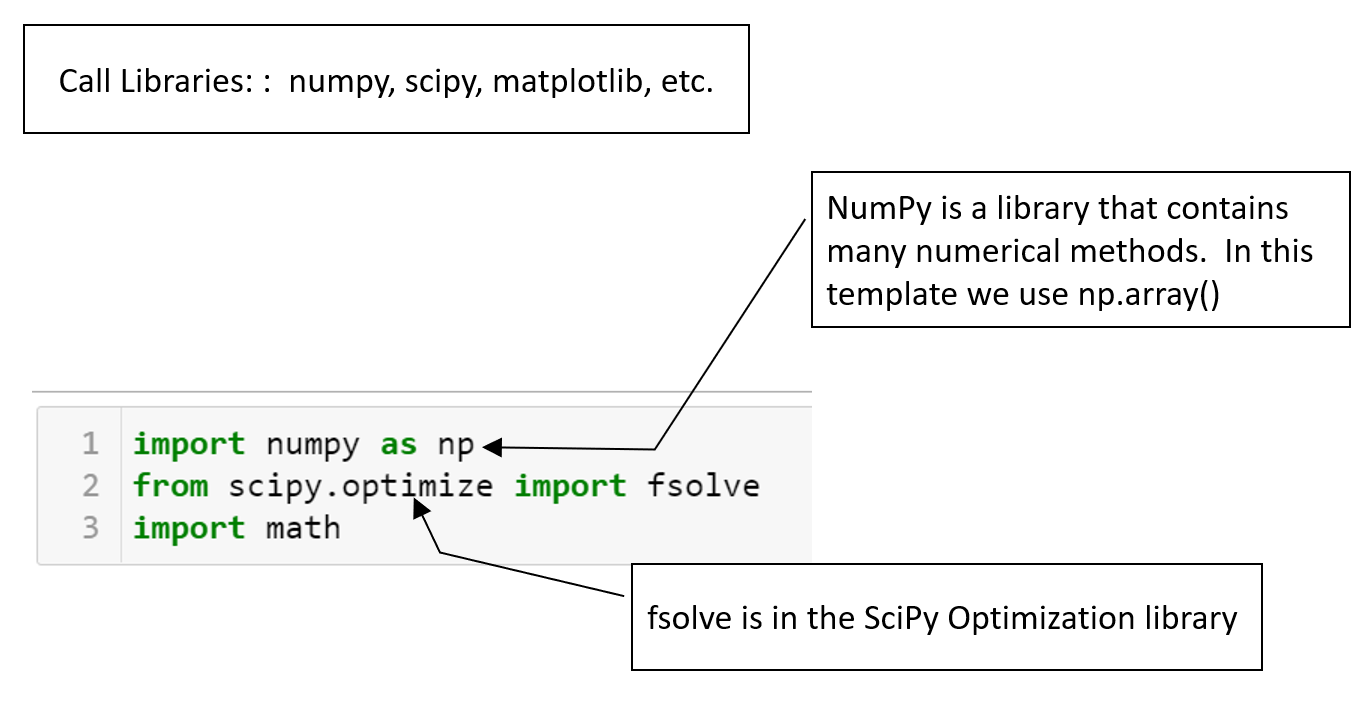

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import math

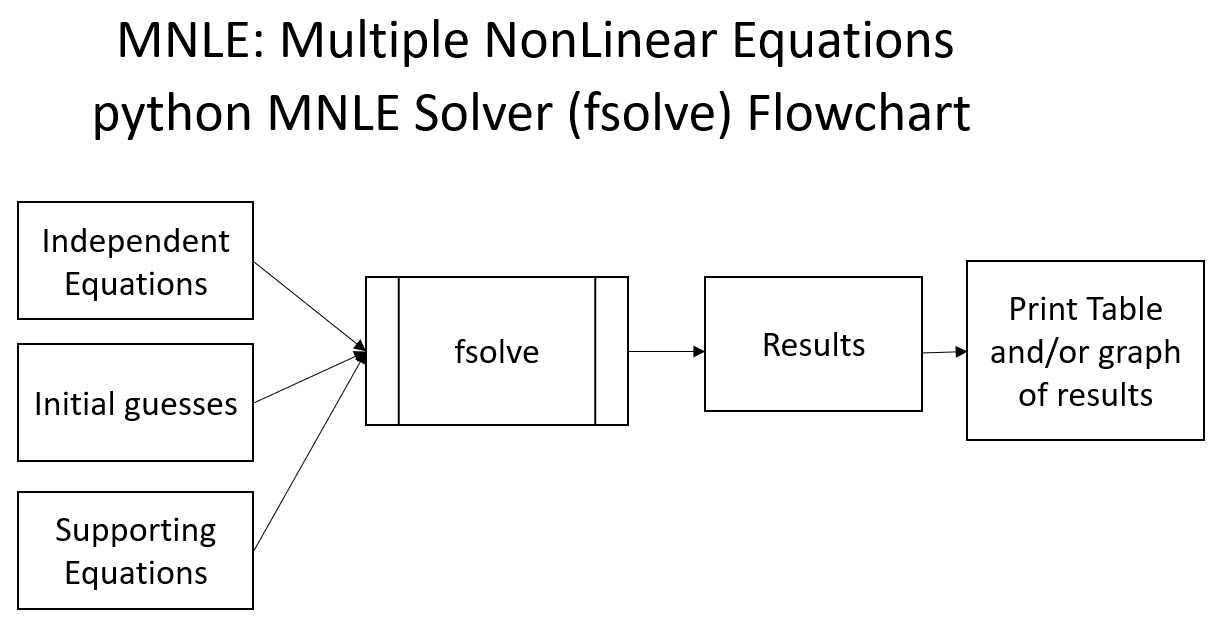

The cell below defines the set of nonlinear equations that we derived above.  This is put into a function so that we can use this many times.  

To find the flowrates we will use the python Scipy function called fsolve.  To use fsolve we will call the function containing all the equations and give it initial guesses for each flowrate.  These initial flowrates are put into a vector x.   The non-linear equations are rearranged so that 0 = f(x) and then the zero obtained from the initial flowrate values are stored in a vector fx.  This completes the required input for fsolve.
The other variables fF, rho, D, pi, k's are used in the nonlinear equations and need to be defined before the variable is used in the nonlinear equation.

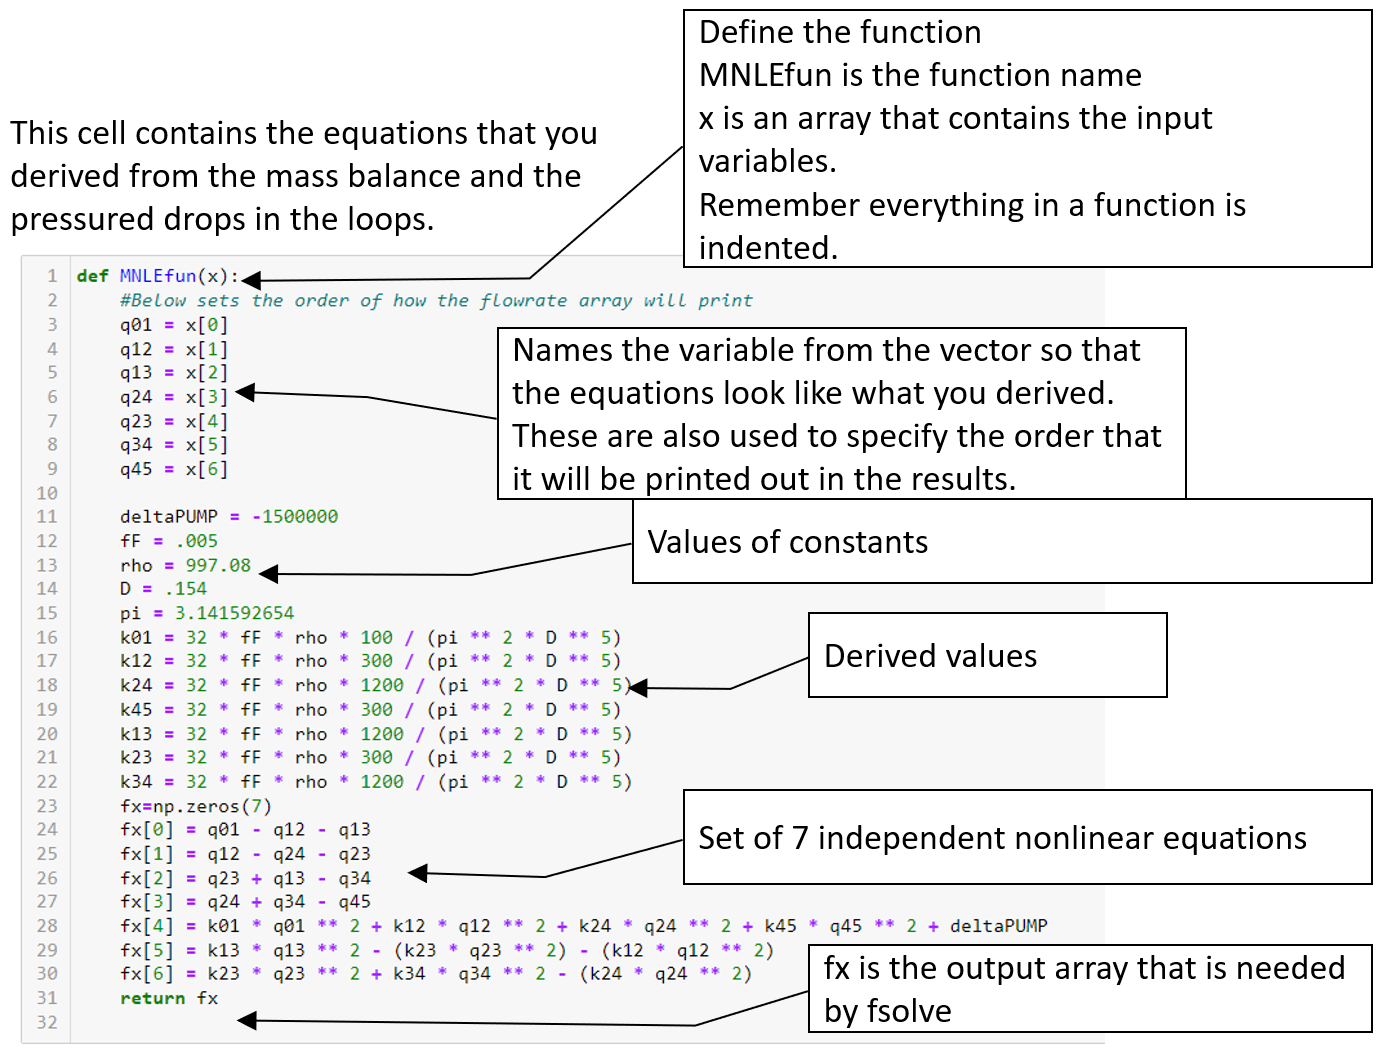

In [ ]:
def MNLEfun(x): 
    #Below sets the order of how the flowrate array will print
    q01 = x[0] 
    q12 = x[1] 
    q13 = x[2] 
    q24 = x[3] 
    q23 = x[4] 
    q34 = x[5] 
    q45 = x[6]
    
        
    deltaPUMP = -1500000 
    fF = .005 
    rho = 997.08 
    D = .154 
    pi = 3.141592654
    k01 = 32 * fF * rho * 100 / (pi ** 2 * D ** 5) 
    k12 = 32 * fF * rho * 300 / (pi ** 2 * D ** 5) 
    k24 = 32 * fF * rho * 1200 / (pi ** 2 * D ** 5) 
    k45 = 32 * fF * rho * 300 / (pi ** 2 * D ** 5) 
    k13 = 32 * fF * rho * 1200 / (pi ** 2 * D ** 5) 
    k23 = 32 * fF * rho * 300 / (pi ** 2 * D ** 5) 
    k34 = 32 * fF * rho * 1200 / (pi ** 2 * D ** 5) 
    fx=np.zeros(7)
    fx[0] = q01 - q12 - q13 
    fx[1] = q12 - q24 - q23 
    fx[2] = q23 + q13 - q34 
    fx[3] = q24 + q34 - q45 
    fx[4] = k01 * q01 ** 2 + k12 * q12 ** 2 + k24 * q24 ** 2 + k45 * q45 ** 2 + deltaPUMP 
    fx[5] = k13 * q13 ** 2 - (k23 * q23 ** 2) - (k12 * q12 ** 2) 
    fx[6] = k23 * q23 ** 2 + k34 * q34 ** 2 - (k24 * q24 ** 2) 
    return fx  


In the cell below I test to make sure the function is working.  Each of these equations can be tested separately by hand or using an excel spreadsheet. 

fsolve required an array for input so the line 8 in the cell below x=np.array([q01,q12,q13,q23,q24,q34,q45]) creates this array.

The print commands show the values input and then calculated from the input.  It is always a good idea to test your functions to see if they work!

In [ ]:
q01=  0.0981369
q12=  0.0648196  
q13 = 0.0333174 
q23  =0.0154472 
q24  =0.0493724 
q34  =0.0487645 
q45  =0.0981369 
x=np.array([q01,q12,q13,q23,q24,q34,q45])
print(x)
print(MNLEfun(x))

[0.0981369 0.0648196 0.0333174 0.0154472 0.0493724 0.0487645 0.0981369]
[-1.00000000e-07  6.93889390e-18  3.39253000e-02 -3.39252000e-02
 -4.92436706e+05 -1.23110940e+05  6.15553945e+05]


## Estimating Initial Valves
Since we used a previous values  from a previous solution  to test the function we would expect the output to be near zero.  In the cell above the output for fx(q24, w34 and q45) is -5e5! This is because we did not input the full precision solution for these the equations.  In the solution below using fsolve the full precision is used in the MNLEfun and the fx is near zero!  The answer for the flowrates is identical to the POLYMATH solution! 
Since we used values of the q's from a previous solution to test the function we would expect the output to be near zero.  In the cell above the output for fx(q24, w34 and q45) is -5e5! This is because we did not input the full precision solution for these the equations.  In the solution below using fsolve the full precision is used in the MNLEfun and the fx is near zero!  The answer for the flowrates is identical to the previous solution! 

In most problems you will not have a previous solution so how do you estimate a q? 
One way to do this is assume that all the flow goes through path 0-1-3-4-5 which is the longest path.

 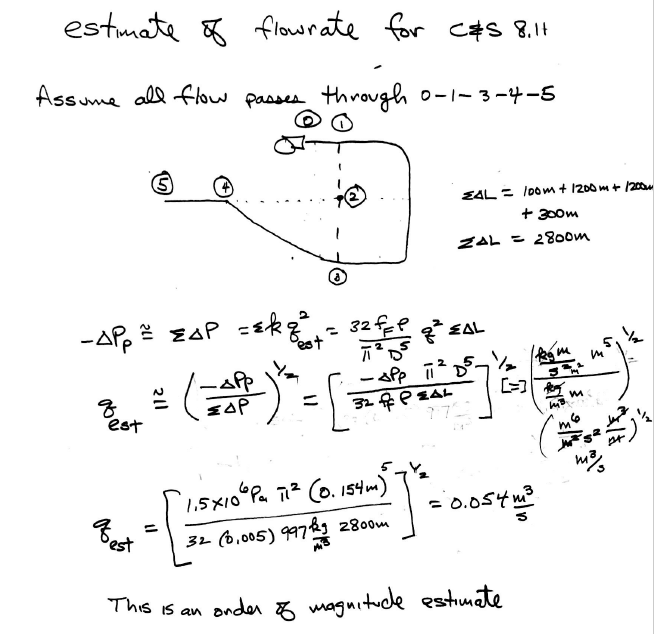


$$\Delta P_{ij} = k_{ij}q_{ij}^2$$<br>
$$k_{ij} = \frac{32 \rho f_{F} \Delta L_{total}}{\pi^2 D^5}$$

One big Loop Equation
$$0=\Delta P_{P}+\Delta P_{01}+\Delta P_{12}+\Delta P_{45}$$
Solve for
$$q_{estimate}^2=\frac {-\Delta P_{P}} {\frac{32 \rho f_F \Delta L_{total}}{\pi^2 D^5}}$$

In [ ]:
deltaPUMP = -1500000 
fF = 0.005 
rho = 997.08 
D = 0.154 
pi = 3.141592654
Ltotal=100+1200++1200+300
k = 32 * fF * rho * 100 / (pi ** 2 * D ** 5)*Ltotal
qest=((-deltaPUMP*pi**2*D**5)/(32*fF*rho*Ltotal))**0.5
print(Ltotal,qest)

2800 0.0535788385332458


So this gives us an initial guess of $q_{est}=0.05m^3/s$

In [ ]:
xguess = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
x=fsolve(MNLEfun,xguess) 
print(x)
#Remember that the order of the x array is given in MNLEfun lines 3-9

[0.0981367  0.0648194  0.0333173  0.04937228 0.01544712 0.04876442
 0.0981367 ]


In [ ]:
x=fsolve(MNLEfun,xguess)
print(x)
fv=MNLEfun(x)#fv was not defined outside of the function so I define it here
print(fv) #This will show how close the fx values were to zero

[0.0981367  0.0648194  0.0333173  0.04937228 0.01544712 0.04876442
 0.0981367 ]
[ 6.93889390e-18 -1.73472348e-18  0.00000000e+00  0.00000000e+00
  9.56002623e-07 -2.18566856e-06  9.21660103e-07]


In [ ]:
x=fsolve(MNLEfun,xguess, xtol=1e-9)
print(x)
fv=MNLEfun(x)#fv was not defined outside of the function so I define it here
print(fv) #This will show how close the fx values were to zero

[0.0981367  0.0648194  0.0333173  0.04937228 0.01544712 0.04876442
 0.0981367 ]
[ 6.93889390e-18  3.46944695e-18  0.00000000e+00  0.00000000e+00
  2.32830644e-09 -5.44241630e-09  2.44472176e-09]


## Printing a Table of Results

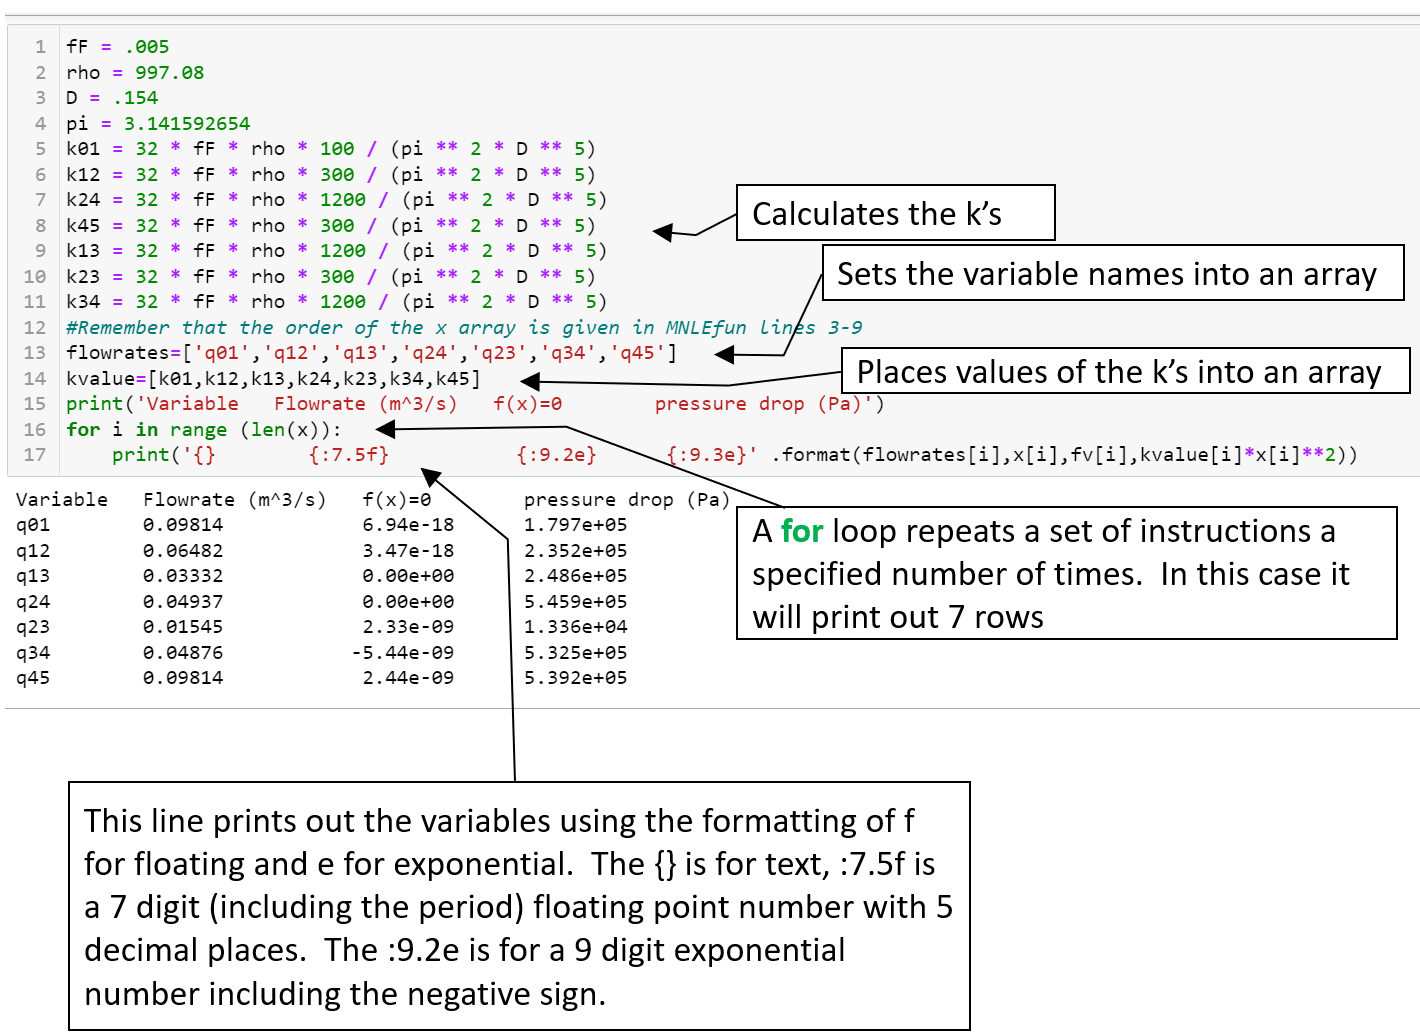

In [ ]:
fF = .005 
rho = 997.08 
D = .154 
pi = 3.141592654
k01 = 32 * fF * rho * 100 / (pi ** 2 * D ** 5) 
k12 = 32 * fF * rho * 300 / (pi ** 2 * D ** 5) 
k24 = 32 * fF * rho * 1200 / (pi ** 2 * D ** 5) 
k45 = 32 * fF * rho * 300 / (pi ** 2 * D ** 5) 
k13 = 32 * fF * rho * 1200 / (pi ** 2 * D ** 5) 
k23 = 32 * fF * rho * 300 / (pi ** 2 * D ** 5) 
k34 = 32 * fF * rho * 1200 / (pi ** 2 * D ** 5) 
#Remember that the order of the x array is given in MNLEfun lines 3-9
flowrates=['q01','q12','q13','q24','q23','q34','q45']
kvalue=[k01,k12,k13,k24,k23,k34,k45]
print('Variable   Flowrate (m^3/s)   f(x)=0        pressure drop (Pa)')
for i in range (len(x)):
    print('{}        {:7.5f}           {:9.2e}      {:9.3e}' .format(flowrates[i],x[i],fv[i],kvalue[i]*x[i]**2))

Variable   Flowrate (m^3/s)   f(x)=0        pressure drop (Pa)
q01        0.09814            6.94e-18      1.797e+05
q12        0.06482            3.47e-18      2.352e+05
q13        0.03332            0.00e+00      2.486e+05
q24        0.04937            0.00e+00      5.459e+05
q23        0.01545            2.33e-09      1.336e+04
q34        0.04876           -5.44e-09      5.325e+05
q45        0.09814            2.44e-09      5.392e+05


You will need to make appropriate alterations in the above for C&S8.11 b in which you eliminate a segment.

In [ ]:
P1=15e5-kvalue[0]*x[0]**2
P2=P1-kvalue[1]*x[1]**2
P3=P2-kvalue[4]*x[4]**2
P4=P3-kvalue[5]*x[5]**2
P5=P4-kvalue[6]*x[6]**2

print(' P1={:10.3e}' .format(P1))
print(' P2={:10.3e}' .format(P2))
print(' P3={:10.3e}' .format(P3))
print(' P4={:10.3e}' .format(P4))
print(' P5={:10.3e}' .format(P5))

 P1= 1.320e+06
 P2= 1.085e+06
 P3= 1.072e+06
 P4= 5.392e+05
 P5=-4.889e-09
